In [1]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [2]:
mnist.train.labels


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [3]:
mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [4]:
mnist.train.num_examples

55000

In [5]:
mnist.test.num_examples

10000

In [6]:
mnist.validation.num_examples

5000

# Visualizing the  Data

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
mnist.train.images[1].shape

(784,)

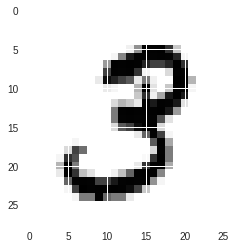

In [10]:
plt.imshow(mnist.train.images[1].reshape(28,28))

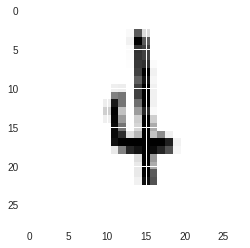

In [12]:
plt.imshow(mnist.train.images[124].reshape(28,28))

In [0]:
import tensorflow as tf

# Create the Model

In [0]:
x= tf.placeholder(tf.float32, shape=[None , 784])

In [0]:
# Create the weight and the bias variable we have ten different outputs
W = tf.Variable(tf.zeros([784 ,10]))

In [0]:
# bias vector
b = tf.Variable(tf.zeros([10]))

In [0]:
# Create the graph
y =tf.matmul(x,W)+b

# Loss and Optimizer


In [0]:
y_true = tf.placeholder(tf.float32 ,[None , 10])

In [0]:
# Cross entrophy
cross_entropy =tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels = y_true , logits =y))

In [0]:
optimizer =tf.train.GradientDescentOptimizer(learning_rate=0.05)

In [0]:
train = optimizer.minimize(cross_entropy)

In [0]:
init =tf.global_variables_initializer()

# Create Session

In [33]:
with tf.Session() as sess:
  sess.run(init)
  for step in range(1000):
    batch_x , batch_y = mnist.train.next_batch(100)
    sess.run(train,feed_dict={x:batch_x,y_true:batch_y})
  # Test the Train Model
  matches = tf.equal(tf.argmax(y,1),tf.argmax(y_true,1))
  acc = tf.reduce_mean(tf.cast(matches , tf.float32))
  print(sess.run(acc,feed_dict={x:mnist.test.images,y_true:mnist.test.labels}))

0.902
